### Dandelion Optimizer

#### Important Links:
- [Paper](https://www.sciencedirect.com/science/article/abs/pii/S0952197622002305)<br>
- [Matlab](https://www.mathworks.com/matlabcentral/fileexchange/114680-dandelion-optimizer)
- [Github](https://github.com/asneerug/DandelionOptimizerTSP/)

#### Imports

In [3]:
import Pkg; 
Pkg.add("SpecialFunctions")
Pkg.add("BenchmarkFunctions")
Pkg.add("HardTestProblems")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Manifest.toml`


In [1]:
using Dates
using SpecialFunctions
using Distributions
using Random
using BenchmarkFunctions
using Plots
using DataFrames
using HardTestProblems
using Printf
using Luxor
using Distances
using TSPLIB

#### Initialization

In [2]:
function initialization(Popsize, Dim, UB, LB)
    Boundary_no = length(UB) # number of boundaries
    
    # Preallocate array for Positions
    Positions = zeros(Popsize, Dim)

    # If the boundaries of all variables are equal and user enters a single number for both UB and LB
    if Boundary_no == 1
        Positions = rand(Popsize, Dim) .* (UB - LB) .+ LB
    end

    # If each variable has a different LB and UB
    if Boundary_no > 1
        for i in 1:Dim
            ub_i = UB[i]
            lb_i = LB[i]
            Positions[:, i] = rand(Popsize) .* (ub_i - lb_i) .+ lb_i
        end
    end

    return Positions
end

initialization (generic function with 1 method)

The above function initializes the starting positions of Dandelions.<br><br>

#### Benchmark Functions

In [3]:
function Get_Functions_details(F)
    Fobj = nothing
    LB = nothing
    UB = nothing
    Dim = nothing

    if F == "F1"
        Fobj = F1
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F2"
        Fobj = F2
        LB = -10
        UB = 10
        Dim = 30
    elseif F == "F3"
        Fobj = F3
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F4"
        Fobj = F4
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F5"
        Fobj = F5
        LB = -30
        UB = 30
        Dim = 30
    elseif F == "F6"
        Fobj = F6
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F7"
        Fobj = F7
        LB = -1.28
        UB = 1.28
        Dim = 30
    elseif F == "F8"
        Fobj = F8
        LB = -500
        UB = 500
        Dim = 30
    elseif F == "F9"
        Fobj = F9
        LB = -5.12
        UB = 5.12
        Dim = 30
    elseif F == "F10"
        Fobj = F10
        LB = -32
        UB = 32
        Dim = 30
    elseif F == "F11"
        Fobj = F11
        LB = -600
        UB = 600
        Dim = 30
    elseif F == "F12"
        Fobj = F12
        LB = -50
        UB = 50
        Dim = 30
    elseif F == "F13"
        Fobj = F13
        LB = -50
        UB = 50
        Dim = 30
    elseif F == "F14"
        Fobj = F14
        LB = -65.536
        UB = 65.536
        Dim = 2
    elseif F == "F15"
        Fobj = F15
        LB = -5
        UB = 5
        Dim = 4
    elseif F == "F16"
        Fobj = F16
        LB = -5
        UB = 5
        Dim = 2
    elseif F == "F17"
        Fobj = F17
        LB = [-5, 0]
        UB = [10, 15]
        Dim = 2
    elseif F == "F18"
        Fobj = F18
        LB = -2
        UB = 2
        Dim = 2
    elseif F == "F19"
        Fobj = F19
        LB = 0
        UB = 1
        Dim = 3
    elseif F == "F20"
        Fobj = F20
        LB = 0
        UB = 1
        Dim = 6
    elseif F == "F21"
        Fobj = F21
        LB = 0
        UB = 10
        Dim = 4
    elseif F == "F22"
        Fobj = F22
        LB = 0
        UB = 10
        Dim = 4
    elseif F == "F23"
        Fobj = F23
        LB = 0
        UB = 10
        Dim = 4
    end

    return LB, UB, Dim, Fobj
end

# Define all benchmark functions below this line

# F1
function F1(x)
    return sum(x.^2)
end

# F2
function F2(x)
    return sum(abs.(x)) + prod(abs.(x))
end

# F3
function F3(x)
    dim = size(x, 2)
    o = 0
    for i in 1:dim
        o += sum(x[1:i])^2
    end
    return o
end

# F4
function F4(x)
    return maximum(abs.(x))
end

# F5
function F5(x)
    sum = 0.0
    for i in 1:length(x)-1
        sum += 100 * (x[i+1] - x[i]^2)^2 + (1 - x[i])^2
    end
    return sum
end

# F6
function F6(x)
    return sum(abs.(x .+ 0.5).^2)
end

# F7
function F7(x)
    dim = size(x, 2)
    return sum(collect(1:dim) .* x.^4) + rand()
end

# F8
function F8(x)
    return sum(-x .* sin.(sqrt.(abs.(x))))
end

# F9
function F9(x)
    dim = size(x, 2)
    return sum(x.^2 - 10 * cos.(2 * π .* x)) + 10 * dim
end

# F10
function F10(x)
    dim = size(x, 2)
    return -20exp(-0.2sqrt(sum(x.^2) / dim)) - exp(sum(cos.(2 * π .* x)) / dim) + 20 + ℯ
end

# F11
function F11(x)
    dim = size(x, 2)
    return sum(x.^2) / 4000 - prod(cos.(x ./ sqrt.(collect(1:dim)))) + 1
end

# F12
function F12(x)
    dim = size(x, 2)
    return (pi / dim) * (10 * ((sin.(pi * (1 + (x[1] + 1) / 4))).^2) + sum((((x[1:dim-1] .+ 1) ./ 4).^2) .* (1 .+ 10 .* ((sin.(pi .* (1 .+ (x[2:dim] .+ 1) ./ 4)))).^2)) + ((x[dim] + 1) / 4)^2) + sum(Ufun(x, 10, 100, 4))
end

# F13
function F13(x)
    dim = size(x, 2)
    return 0.1 * ((sin.(3 * π * x[1]))^2 + sum((x[1:dim-1] .- 1).^2 .* (1 .+ (sin.(3 * π .* x[2:dim])) .^ 2)) + ((x[dim] - 1)^2) * (1 .+ (sin.(2 * π * x[dim])))^2) + sum(Ufun(x, 5, 100, 4))
end

# F14
function F14(x)
    aS = [-32 -16 0 16 32 -32 -16 0 16 32 -32 -16 0 16 32 -32 -16 0 16 32 -32 -16 0 16 32; -32 -32 -32 -32 -32 -16 -16 -16 -16 -16 0 0 0 0 0 16 16 16 16 16 32 32 32 32 32]
    bS = [sum((x' .- aS[:, j]) .^ 6) for j in 1:25]
    return (1 / 500 + sum(1 ./ (collect(1:25) .+ bS)))^(-1)
end

# F15
function F15(x)
    aK = [0.1957, 0.1947, 0.1735, 0.16, 0.0844, 0.0627, 0.0456, 0.0342, 0.0323, 0.0235, 0.0246]
    bK = 1 ./ [0.25, 0.5, 1, 2, 4, 6, 8, 10, 12, 14, 16]
    return sum((aK .- (x[1] .* (bK .^ 2 .+ x[2] .* bK) ./ (bK .^ 2 .+ x[3] .* bK .+ x[4]))).^2)
end

# F16
function F16(x)
    return 4 * x[1]^2 - 2.1 * x[1]^4 + x[1]^6 / 3 + x[1] * x[2] - 4 * x[2]^2 + 4 * x[2]^4
end

# F17
function F17(x)
    return (x[2] - (x[1]^2) * 5.1 / (4 * (π^2)) + 5 / π * x[1] - 6)^2 + 10 * (1 - 1 / (8 * π)) * cos(x[1]) + 10
end

# F18
function F18(x)
    return (1 + (x[1] + x[2] + 1)^2 * (19 - 14 * x[1] + 3 * (x[1]^2) - 14 * x[2] + 6 * x[1] * x[2] + 3 * x[2]^2)) * (30 + (2 * x[1] - 3 * x[2])^2 * (18 - 32 * x[1] + 12 * (x[1]^2) + 48 * x[2] - 36 * x[1] * x[2] + 27 * x[2]^2))
end

# F19
function F19(x)
    aH = [3 10 30; 0.1 10 35; 3 10 30; 0.1 10 35]
    cH = [1, 1.2, 3, 3.2]
    pH = [0.3689 0.117 0.2673; 0.4699 0.4387 0.747; 0.1091 0.8732 0.5547; 0.03815 0.5743 0.8828]
    o = 0
    for i in 1:4
        o -= cH[i] * exp(-(sum(aH[i, :] .* ((x .- pH[i, :]).^2))))
    end
    return o
end

# F20
function F20(x)
    aH = [10 3 17 3.5 1.7 8; 0.05 10 17 0.1 8 14; 3 3.5 1.7 10 17 8; 17 8 0.05 10 0.1 14]
    cH = [1, 1.2, 3, 3.2]
    pH = [0.1312 0.1696 0.5569 0.0124 0.8283 0.5886; 0.2329 0.4135 0.8307 0.3736 0.1004 0.9991; 0.2348 0.1415 0.3522 0.2883 0.3047 0.6650; 0.4047 0.8828 0.8732 0.5743 0.1091 0.0381]
    o = 0
    for i in 1:4
        o -= cH[i] * exp(-sum(aH[i, :] .* ((x .- pH[i, :]).^2)))
    end
    return o
end

# F21
function F21(x)
    aSH = [4 4 4 4; 1 1 1 1; 8 8 8 8; 6 6 6 6; 3 7 3 7; 2 9 2 9; 5 5 3 3; 8 1 8 1; 6 2 6 2; 7 3.6 7 3.6]
    cSH = [0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5]
    o = 0
    for i in 1:5
        o -= sum((x .- aSH[i, :]) * (x .- aSH[i, :])' .+ cSH[i])^(-1)
    end
    return o
end

# F22
function F22(x)
    aSH = [4 4 4 4; 1 1 1 1; 8 8 8 8; 6 6 6 6; 3 7 3 7; 2 9 2 9; 5 5 3 3; 8 1 8 1; 6 2 6 2; 7 3.6 7 3.6]
    cSH = [0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5]
    o = 0
    for i in 1:7
        o -= sum((x .- aSH[i, :]) * (x .- aSH[i, :])' .+ cSH[i])^(-1)
    end
    return o
end

# F23
function F23(x)
    aSH = [4 4 4 4; 1 1 1 1; 8 8 8 8; 6 6 6 6; 3 7 3 7; 2 9 2 9; 5 5 3 3; 8 1 8 1; 6 2 6 2; 7 3.6 7 3.6]
    cSH = [0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5]
    o = 0
    for i in 1:10
        o -= sum((x .- aSH[i, :]) * (x .- aSH[i, :])' .+ cSH[i])^(-1)
    end
    return o
end

function Ufun(x, a, k, m)
    return k .* ((x .- a) .^ m) .* (x .> a) .+ k .* ((-x .- a) .^ m) .* (x .< -a)
end


Ufun (generic function with 1 method)

Implemented CEC 2017 functions in Julia since we couldn't find any implementations for the same online.<br><br>
These have been implemented in the same way as done in the Matlab code.

#### Dandelion Optimizer
__Parameters__:
- Popsize: Determines the number of dandelions initialized
- Dim: States the number of dimensions of the problem
- UB, LB: This is an array giving the upper and lower bounds for the initialization values<br>

__Returns__:
- Initial Positions of all the dandelions

In [4]:
function levy(n, m, beta)
    num = gamma(1+beta)*sin(pi*beta/2)
    den = gamma((1+beta)/2)*beta*2^((beta-1)/2)
    sigma_u = (num/den)^(1/beta)
    u = rand(Normal(0,sigma_u^2), (n, m))
    v = rand(Normal(0,1), (n, m))
    z = u./(abs.(v).^(1/beta))
    return z
end

levy (generic function with 1 method)

In [5]:
function DO(Popsize, Maxiteration, LB, UB, Dim, Fobj)
    start_time = time()
    dandelions = initialization(Popsize, Dim, UB, LB)
    dandelionsFitness = zeros(Popsize)
    Convergence_curve = zeros(Maxiteration)
    for i in 1:Popsize
        dandelionsFitness[i] = Fobj(dandelions[i, :])
    end

    # Calculate the fitness values of initial dandelions.
    sorted_indexes = sortperm(dandelionsFitness)
    Best_position = dandelions[sorted_indexes[1], :]
    Best_fitness = dandelionsFitness[sorted_indexes[1]]
    Convergence_curve[1] = Best_fitness
    t = 2

    while t < Maxiteration + 1

        dandelions_1 = zeros(Popsize, Dim)

        ## Rising stage
        beta = randn(Popsize, Dim)
        alpha = rand() * ((1 / Maxiteration^2) * t^2 - 2 / Maxiteration * t + 1)  # eq.(8) in this paper
        a = 1 / (Maxiteration^2 - 2 * Maxiteration + 1)  # Note: U can use positive or negative on 1 for solving ur problem.
        b = -2a
        c = 1 - a - b
        k = 1 - rand() * (c + a * t^2 + b * t)  # eq.(11) in this paper
        if randn() < 1.5
            for i in 1:Popsize
                lamb = abs.(randn(Dim))  # Generate lamb as a 1D array with length Dim
                theta = (2 * rand() - 1) * pi
                row = 1 / exp(theta)
                vx = row * cos(theta)
                vy = row * sin(theta)
                NEW = rand(Dim) .* (UB .- LB) .+ LB  # Generate NEW as a 1D array with length Dim
                logpdf_vals = logpdf.(LogNormal(0, 1), lamb)
                rhs = alpha * vx * vy * logpdf_vals .* (NEW - dandelions[i, :])  # Remove [i, :] indexing from NEW
                dandelions_1[i, :] .= dandelions[i, :] .+ rhs
            end
        else
            for i in 1:Popsize
                dandelions_1[i, :] .= dandelions[i, :] .* k  # eq.(10) in this paper
            end
        end
        dandelions .= dandelions_1
        # Check boundaries
        dandelions .= max.(dandelions, LB')
        dandelions .= min.(dandelions, UB')

        ## Decline stage
        dandelions_mean = sum(dandelions, dims=1) / Popsize  # eq.(14) in this paper
        dandelions_2 = similar(dandelions)  # Preallocate dandelions_2 array
        for i in 1:Popsize
            for j in 1:Dim
                dandelions_2[i, j] = dandelions[i, j] - beta[i, j] * alpha * (dandelions_mean[1, j] - beta[i, j] * alpha * dandelions[i, j])  # eq.(13) in this paper
            end
        end
        dandelions .= dandelions_2
        # Check boundaries
        dandelions .= max.(dandelions, LB')
        dandelions .= min.(dandelions, UB')

        ## Landing stage
        Step_length = levy(Popsize, Dim, 1.5)
        Elite = repeat(Best_position', inner=(Popsize, 1))
        dandelions_3 = similar(dandelions)

        for i in 1:Popsize
            for j in 1:Dim
                dandelions_3[i, j] = Elite[i, j] + Step_length[i, j] * alpha * (Elite[i, j] - dandelions[i, j]) * (2 * t / Maxiteration)
            end
        end
        dandelions .= dandelions_3  # Update dandelions with the corrected values

        # Check boundaries
        dandelions = max.(dandelions, LB')  # Adjusted to update dandelions_3 directly
        dandelions = min.(dandelions, UB')

        # Calculate fitness values
        for i in 1:Popsize
            dandelionsFitness[i] = Fobj(dandelions[i, :])
        end

        sorted_indexes = sortperm(dandelionsFitness)
        dandelions = dandelions[sorted_indexes[1:Popsize], :]
        SortedfitbestN = dandelionsFitness[sorted_indexes[1:Popsize]]

        # Update optimal seed
        if SortedfitbestN[1] < Best_fitness
            Best_position = dandelions[1, :]
            Best_fitness = SortedfitbestN[1]
        end

        Convergence_curve[t] = Best_fitness
        t = t + 1
    end
    end_time = time()
    total_time = end_time - start_time
    return Best_fitness, Best_position, Convergence_curve, total_time
end


DO (generic function with 1 method)

In [6]:
# N = 30  # Number of search agents
# Max_iter = 1000  # Maximum number of iterations

# F_name = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22", "F23"]

# for i in 1:4
#     current_F = F_name[i]
#     lb_i, ub_i, dim_i, f_i = Get_Functions_details(current_F)
#     Best_fitness, Best_position, Convergence_curve, elapsed_time = DO(N, Max_iter, lb_i, ub_i, dim_i, f_i)
#     display(plot(1:Max_iter, Convergence_curve, color=:red, linewidth=2.5, yaxis=:log,
#         title="Convergence curve ($current_F)", xlabel="Iteration", ylabel="Best score obtained so far"))

#     println("The running time is: ", elapsed_time)
#     println("The best fitness is: ", Best_fitness)
#     println("The best position is: ", Best_position)
# end

In [7]:
# monte_simulation = 30

# results_df = DataFrame(Function = String[], Fitness_Mean = Float64[], Fitness_STD = Float64[])

# for i in 1:length(F_name)
#     current_F = F_name[i]

#     data = zeros(monte_simulation)
    
#     for j in 1:monte_simulation
#         lb_i, ub_i, dim_i, f_i = Get_Functions_details(current_F)
#         Best_fitness, Best_position, Convergence_curve, elapsed_time = DO(N, Max_iter, lb_i, ub_i, dim_i, f_i)

#         data[j] = Best_fitness
#     end
#     avg = mean(data)
#     sd = std(data)

# 	push!(results_df, [current_F, avg, sd])
# end

# println(results_df)

### Statistical Analysis

##### Dimensions: 50

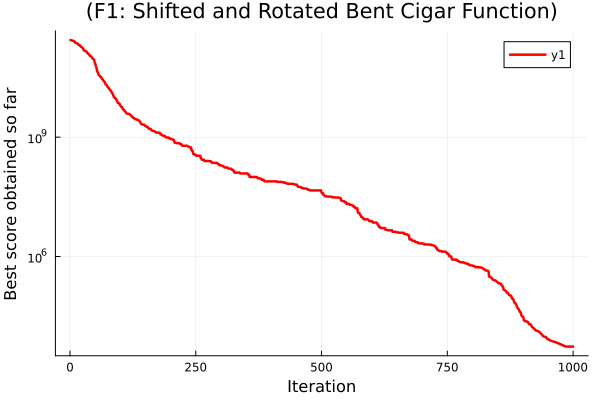

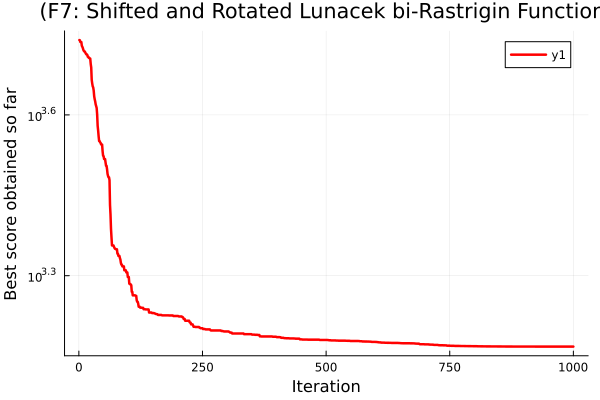

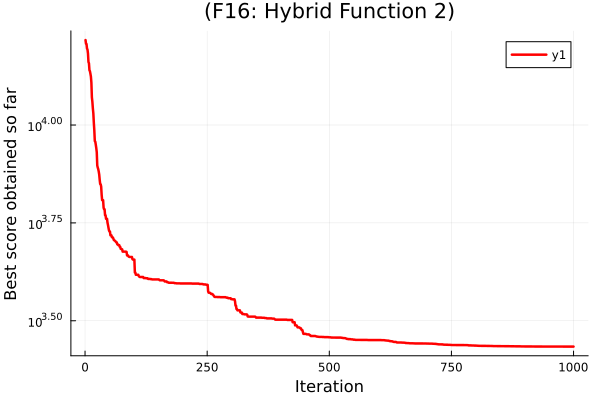

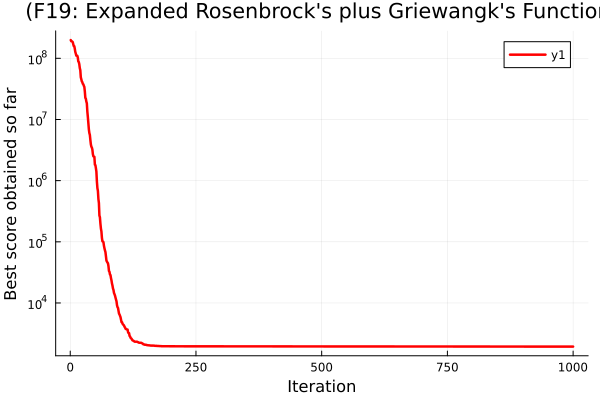

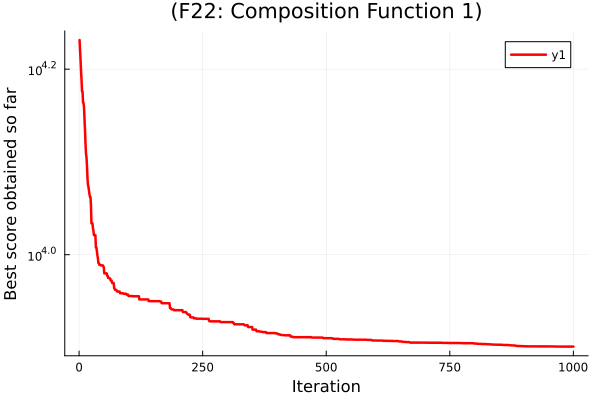

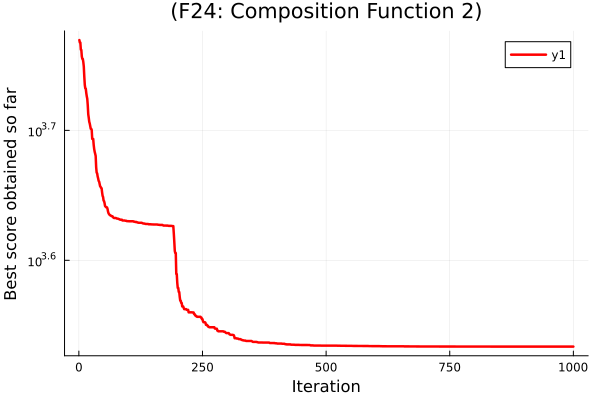

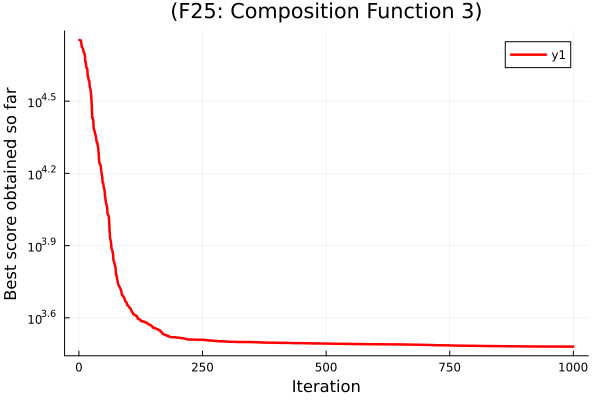

7×4 DataFrame
 Row │ Function                           Fitness_Mean  Fitness_STD  Avg_time 
     │ String                             String        String       String   
─────┼────────────────────────────────────────────────────────────────────────
   1 │ F1: Shifted and Rotated Bent Cig…  2.03e+04      1.67e+04     0.45
   2 │ F7: Shifted and Rotated Lunacek …  1.72e+03      1.63e+02     0.41
   3 │ F16: Hybrid Function 2             3.39e+03      4.05e+02     0.65
   4 │ F19: Expanded Rosenbrock's plus …  1.96e+03      2.33e+01     0.38
   5 │ F22: Composition Function 1        1.04e+04      1.13e+03     1.50
   6 │ F24: Composition Function 2        3.81e+03      2.17e+02     2.09
   7 │ F25: Composition Function 3        3.08e+03      2.70e+01     2.81


In [8]:
N = 30  # Number of search agents
Max_iter = 1000  # Maximum number of iterations
results_df = DataFrame(Function=String[], Fitness_Mean=String[], Fitness_STD=String[], Avg_time=String[])
monte_simulation = 30

fs = [get_cec2020_problem(1, n=50), get_cec2020_problem(3, n=50), get_cec2020_problem(6, n=50),	get_cec2020_problem(4, n=50), get_cec2020_problem(8, n=50), get_cec2020_problem(9, n=50), get_cec2020_problem(10, n=50)]
f_names = ["F1: Shifted and Rotated Bent Cigar Function", "F7: Shifted and Rotated Lunacek bi-Rastrigin Function", "F16: Hybrid Function 2", "F19: Expanded Rosenbrock's plus Griewangk's Function", "F22: Composition Function 1", "F24: Composition Function 2", "F25: Composition Function 3"]

for i in 1:length(fs)
    data = zeros(monte_simulation)

	avg_time = 0

    f_i = fs[i][1]
    conf_i = fs[i][2]
    current_F = f_names[i]

    best_val, best_pos, con_curve = Inf, [], []

    for j in 1:monte_simulation
        Best_fitness, Best_position, Convergence_curve, elapsed_time = DO(N, Max_iter, conf_i[:xmin], conf_i[:xmax], conf_i[:n], f_i)

        data[j] = Best_fitness
		avg_time += elapsed_time/monte_simulation

        if (best_val > Best_fitness)
            best_val = Best_fitness
            best_pos = Best_position
            con_curve = Convergence_curve
        end
    end

    display(plot(1:Max_iter, con_curve, color=:red, linewidth=2.5, yaxis=:log,
        title="($current_F)", xlabel="Iteration", ylabel="Best score obtained so far", fontsize=10))

    avg = mean(data)
    sd = std(data)

    push!(results_df, [current_F, @sprintf("%.2e", avg), @sprintf("%.2e", sd), @sprintf("%.2f", avg_time)])
end

println(results_df)

##### Dimensions: 100

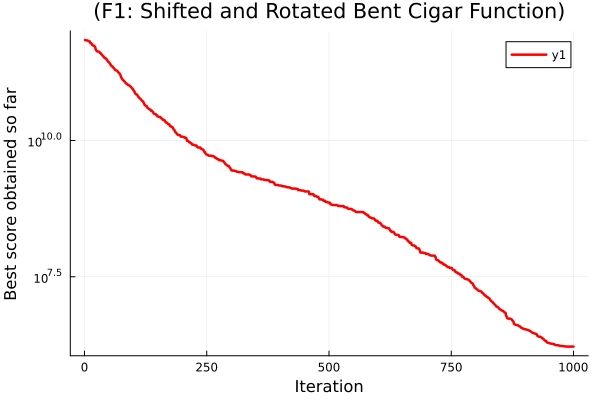

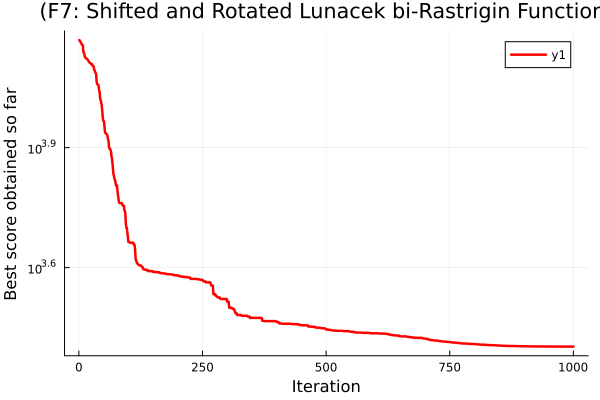

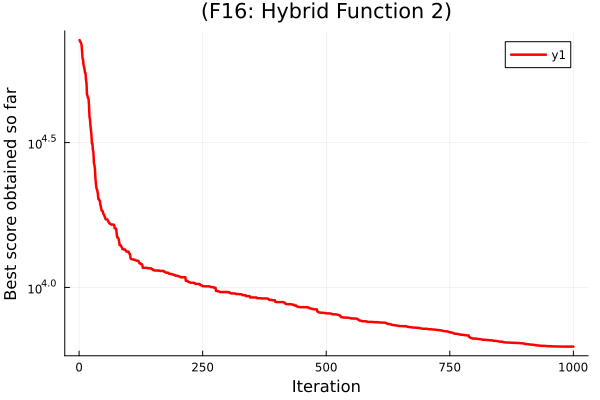

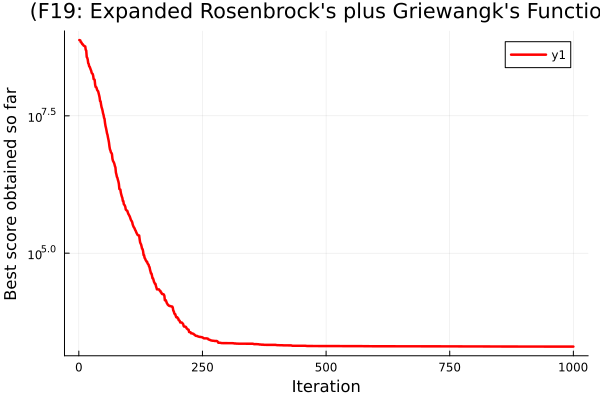

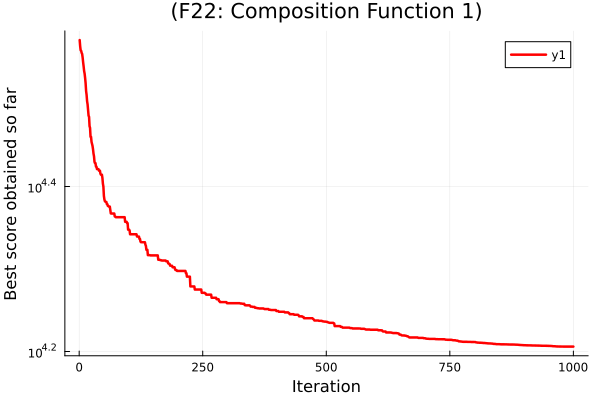

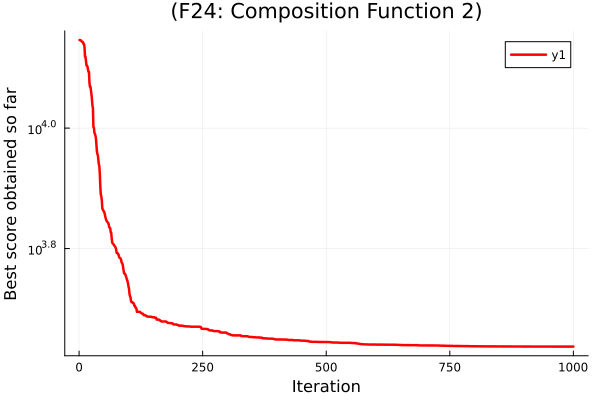

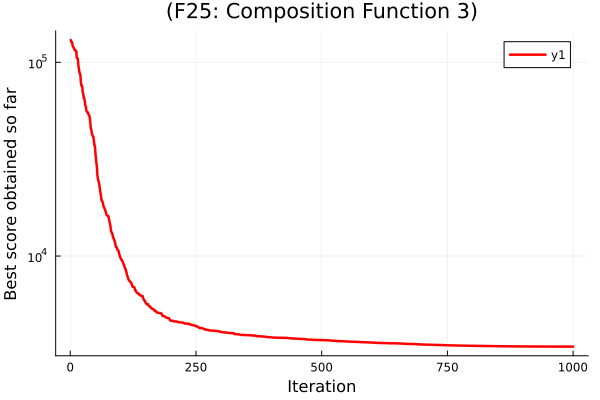

7×4 DataFrame
 Row │ Function                           Fitness_Mean  Fitness_STD  Avg_time 
     │ String                             String        String       String   
─────┼────────────────────────────────────────────────────────────────────────
   1 │ F1: Shifted and Rotated Bent Cig…  3.51e+06      2.14e+06     0.85
   2 │ F7: Shifted and Rotated Lunacek …  3.27e+03      4.20e+02     1.37
   3 │ F16: Hybrid Function 2             7.79e+03      9.66e+02     1.69
   4 │ F19: Expanded Rosenbrock's plus …  2.12e+03      4.95e+01     1.82
   5 │ F22: Composition Function 1        1.99e+04      1.78e+03     8.21
   6 │ F24: Composition Function 2        4.93e+03      2.70e+02     11.73
   7 │ F25: Composition Function 3        3.52e+03      7.46e+01     11.48


In [9]:
N = 30  # Number of search agents
Max_iter = 1000  # Maximum number of iterations
results_df = DataFrame(Function=String[], Fitness_Mean=String[], Fitness_STD=String[], Avg_time=String[])
monte_simulation = 30

fs = [get_cec2020_problem(1, n=100), get_cec2020_problem(3, n=100), get_cec2020_problem(6, n=100),	get_cec2020_problem(4, n=100), get_cec2020_problem(8, n=100), get_cec2020_problem(9, n=100), get_cec2020_problem(10, n=100)]

for i in 1:length(fs)
    data = zeros(monte_simulation)

	avg_time = 0

    f_i = fs[i][1]
    conf_i = fs[i][2]
    current_F = f_names[i]

    best_val, best_pos, con_curve = Inf, [], []

    for j in 1:monte_simulation
        Best_fitness, Best_position, Convergence_curve, elapsed_time = DO(N, Max_iter, conf_i[:xmin], conf_i[:xmax], conf_i[:n], f_i)

        data[j] = Best_fitness
		avg_time += elapsed_time/monte_simulation

        if (best_val > Best_fitness)
            best_val = Best_fitness
            best_pos = Best_position
            con_curve = Convergence_curve
        end
    end

    display(plot(1:Max_iter, con_curve, color=:red, linewidth=2.5, yaxis=:log,
        title="($current_F)", xlabel="Iteration", ylabel="Best score obtained so far", fontsize=10))

    avg = mean(data)
    sd = std(data)

    push!(results_df, [current_F, @sprintf("%.2e", avg), @sprintf("%.2e", sd), @sprintf("%.2f", avg_time)])
end

println(results_df)

## Dandelion Optimizer with TSP

In [2]:
# compute cost of tsp tour
function tour_cost(d::Array{Float64,2}, o::Array{Int64,1})
    n=length(o)
    result = d[o[n],o[1]]
    for i in 1:(n-1)
        result += d[o[i],o[i+1]]
    end
    return result
end

tour_cost (generic function with 1 method)

In [3]:
# flip segment
function two_opt_swap(tour::Array{Int64,1}, i::Int64, j::Int64)
    n = length(tour)
    new_tour = copy(tour)
    new_tour[i:j] = reverse(new_tour[i:j])
    return new_tour
end

function two_opt_tsp(d::Array{Float64,2}, tsp::Array{Int64,1})
    n = length(tsp)
    
    # initialize 
    best_tour = copy(tsp)
    best_cost = tour_cost(d, best_tour)
    
    improved = true
    while improved
        improved = false
        # two nested loops
        for i in 1:(n-1), j in (i+1):n
            if i == 1 && j == n
                #println("skip!")
            else
                new_candidate = two_opt_swap(best_tour, i, j)
                candidate_cost = tour_cost(d, new_candidate)
                if candidate_cost < best_cost
                    best_tour = new_candidate
                    best_cost = candidate_cost
                    improved = true
                    break
                end
            end
        end
    end
    return best_tour, best_cost
end

function match_twice_and_stitch(d::Array{Float64, 2}, tsp::Array{Int64, 1})
    n = length(tsp)
    
    # Divide the cities into two groups
    group1 = tsp[1:div(n, 2)]
    group2 = tsp[div(n, 2)+1:end]
    
    # Match each city in group1 with its nearest neighbor in group2
    matching_tour1 = []
    for city1 in group1
        nearest_neighbor = argmin([d[city1, city2] for city2 in group2])
        push!(matching_tour1, city1)
        push!(matching_tour1, group2[nearest_neighbor])
        deleteat!(group2, nearest_neighbor)
    end
    
    # Match each city in group2 with its nearest neighbor in group1
    matching_tour2 = []
    for city2 in group2
        nearest_neighbor = argmin([d[city2, city1] for city1 in group1])
        push!(matching_tour2, city2)
        push!(matching_tour2, group1[nearest_neighbor])
        deleteat!(group1, nearest_neighbor)
    end
    
    # Stitch the two matching tours together
    final_tour = Array{Int64}(vcat(matching_tour1, matching_tour2))
    
    # Calculate the cost of the final tour using tour_cost function
    final_cost = tour_cost(d, final_tour)
    
    return final_tour, final_cost
end

match_twice_and_stitch (generic function with 1 method)

In [4]:
# Swap segments for 3-opt
function three_opt_swap(tour::Array{Int64, 1}, i::Int64, j::Int64, k::Int64)
    n = length(tour)
    new_tour = copy(tour)
    new_tour[i:j] = reverse(new_tour[i:j])
    new_tour[j+1:k] = reverse(new_tour[j+1:k])
    return new_tour
end

# 3-opt TSP implementation
function three_opt_tsp(d::Array{Float64, 2}, tsp::Array{Int64, 1})
    n = length(tsp)

    # Initialize
    best_tour = copy(tsp)
    best_cost = tour_cost(d, best_tour)

    improved = true
    while improved
        improved = false
        for i in 1:(n-2), j in (i+1):(n-1), k in (j+1):n
            new_candidate = three_opt_swap(best_tour, i, j, k)
            candidate_cost = tour_cost(d, new_candidate)
            if candidate_cost < best_cost
                best_tour = new_candidate
                best_cost = candidate_cost
                improved = true
                break
            end
        end
    end
    return best_tour, best_cost
end


three_opt_tsp (generic function with 1 method)

In [5]:
# Landing stage combine it later with the code
function levy_single(beta)
    num = gamma(1+beta) * sin(pi * beta / 2)
    den = gamma((1+beta) / 2) * beta * 2^((beta-1) / 2)
    sigma_u = (num / den)^(1 / beta)
    u = rand(Normal(0, sigma_u^2))
    v = rand(Normal(0, 1))
    z = u / (abs(v)^(1 / beta))
    return z
end

levy_single (generic function with 1 method)

In [6]:
function ordered_crossover(parent1::Array{Int64, 1}, parent2::Array{Int64, 1})
    n = length(parent1)
    offspring = zeros(Int, n)
    
    # Choose a random subset of genes from parent1
    subset_size = rand(1:n)
    subset_indices = sort(sample(1:n, subset_size, replace=false))
    subset = parent1[subset_indices]
    
    # Fill the offspring with the subset from parent1
    offspring[subset_indices] = subset
    
    # Fill in the remaining positions with genes from parent2
    remaining_indices = setdiff(1:n, subset_indices)
    remaining_genes = filter(g -> !(g in subset), parent2)
    offspring[remaining_indices] = remaining_genes
    
    return offspring
end

ordered_crossover (generic function with 1 method)

In [7]:
function initialization_tsp(cities, d, Popsize, Dim)
    tours = []
    costs = []
    for i in 1:Popsize
        tour = [1:1:Dim;]
        tour = tour[randperm(length(tour))]
        push!(tours, tour)
        cost = tour_cost(d,tour)
        push!(costs, cost)
    end

    return tours, costs
end

initialization_tsp (generic function with 1 method)

In [8]:
function DO_tsp(Popsize, Maxiteration, cities, coordinates, d)
    start_time = time()
    dandelions, dandelionsFitness = initialization_tsp(coordinates, d, Popsize, cities)
    Convergence_curve = zeros(Maxiteration)

    # Calculate the fitness values of initial dandelions.
    sorted_indexes = sortperm(dandelionsFitness)
    Best_position = dandelions[sorted_indexes[1], :]
	Best_position = convert(Vector{Int64}, Best_position[1])
    Best_fitness = dandelionsFitness[sorted_indexes[1]]
    Convergence_curve[1] = Best_fitness
    t = 2

    while t < Maxiteration + 1

        # dandelions_1 = zeros(Popsize, Dim)

        ## Rising stage
        beta = randn(Popsize, cities)
        alpha = rand() * ((1 / Maxiteration^2) * t^2 - 2 / Maxiteration * t + 1)  # eq.(8) in this paper
        a = 1 / (Maxiteration^2 - 2 * Maxiteration + 1)  # Note: U can use positive or negative on 1 for solving ur problem.
        b = -2a
        c = 1 - a - b
        k = 1 - rand() * (c + a * t^2 + b * t)  # eq.(11) in this paper
        if randn() < 1.5
            for i in 1:Popsize
				size = floor(Int, rand() * 0.5 * alpha * cities)
				start_index = rand(1:length(dandelions[i])-size+1)
				subarray = dandelions[i][start_index:start_index+size-1]
				shuffled_subarray = shuffle(subarray)
				dandelions[i][start_index:start_index+size-1] .= shuffled_subarray
                dandelionsFitness[i] = tour_cost(d, dandelions[i])
            end
        else
            for i in 1:Popsize
                dandelions[i], dandelionsFitness[i] = two_opt_tsp(d, dandelions[i])
            end
        end

        ## Decline stage
        # dandelions_mean = sum(dandelions, dims=1) / Popsize  # eq.(14) in this paper
        # dandelions_2 = similar(dandelions)  # Preallocate dandelions_2 array
        for i in 1:Popsize
            for j in 1:cities
                if abs(alpha * beta[i, j]) > 1.5
                    x, y = rand(1:length(dandelions[i])), rand(1:length(dandelions[i]))
                    dandelions[i][x], dandelions[i][y] = dandelions[i][y], dandelions[i][x]
                end
            end
        end
        # dandelions .= dandelions_2
        # # Check boundaries
        # dandelions .= max.(dandelions, LB')
        # dandelions .= min.(dandelions, UB')

        ## Landing stage
		Best_position, Best_fitness = two_opt_tsp(d, Best_position)
        elite_fitness = copy(Best_fitness)
        for i in 1:Popsize
            fitness = tour_cost(d, dandelions[i])
            if fitness != elite_fitness && levy_single(1.5) > 0 && alpha * (fitness - elite_fitness) * (2 * t / Maxiteration) > 0.5
                dandelions[i] = ordered_crossover(Best_position, dandelions[i])
				dandelionsFitness[i] = tour_cost(d, dandelions[i])
			end
        end

        # # Check boundaries
        # dandelions = max.(dandelions, LB')  # Adjusted to update dandelions_3 directly
        # dandelions = min.(dandelions, UB')

        # Calculate fitness values
        for i in 1:Popsize
            dandelionsFitness[i] = tour_cost(d, dandelions[i])
        end

        sorted_indexes = sortperm(dandelionsFitness)
        dandelions = dandelions[sorted_indexes[1:Popsize], :]
        SortedfitbestN = dandelionsFitness[sorted_indexes[1:Popsize]]

        # Update optimal seed
        if SortedfitbestN[1] < Best_fitness
            Best_position = dandelions[1, :]
			Best_position = convert(Vector{Int64}, Best_position[1])
            Best_fitness = SortedfitbestN[1]
        end

        Convergence_curve[t] = Best_fitness

		# if t % 10 == 0
		# 	println(t)
		# end

        t = t + 1
    end
    end_time = time()
    total_time = end_time - start_time
    return Best_fitness, Best_position, Convergence_curve, total_time
end


DO_tsp (generic function with 1 method)

In [9]:
function draw_tsp_scaled(x, o, n, filename, size=1000, radius=5, scale_factor=1)
    Drawing(size, size, "$filename.png")
    stretch = Int64(0.9 * size)
    origin(Int64(0.05 * size), Int64(0.05 * size))
    # draw cities
    for i in 1:n
        A = Point(stretch * x[1, i] / scale_factor, stretch * x[2, i] / scale_factor)
        circle(A, radius, :fill)
        label("city $i", :S, A)
    end
    # connect cities by edges
    for i in 1:n-1
        A = Point(stretch * x[1, o[i]] / scale_factor, stretch * x[2, o[i]] / scale_factor)
        B = Point(stretch * x[1, o[i+1]] / scale_factor, stretch * x[2, o[i+1]] / scale_factor)
        line(A, B, :stroke)
    end
    # return to first city
    A = Point(stretch * x[1, o[n]] / scale_factor, stretch * x[2, o[n]] / scale_factor)
    B = Point(stretch * x[1, o[1]] / scale_factor, stretch * x[2, o[1]] / scale_factor)
    line(A, B, :stroke)
    finish()
    preview()
end


draw_tsp_scaled (generic function with 4 methods)

In [11]:
n = 100
coordinates = rand(2,n)
d = pairwise(Euclidean(), coordinates, dims=2)
best_fitness, best_tour, convergence_curve, total_time = DO_tsp(20, 100, n, coordinates, d)

(8.11320933882297, [72, 81, 45, 84, 58, 86, 31, 10, 60, 78  …  13, 16, 79, 63, 18, 27, 30, 57, 29, 70], [48.92220386031409, 8.766309799530188, 8.766309799530188, 8.766309799530188, 8.766309799530188, 8.766309799530188, 8.766309799530188, 8.766309799530188, 8.766309799530188, 8.766309799530188  …  8.11320933882297, 8.11320933882297, 8.11320933882297, 8.11320933882297, 8.11320933882297, 8.11320933882297, 8.11320933882297, 8.11320933882297, 8.11320933882297, 8.11320933882297], 3.8559999465942383)

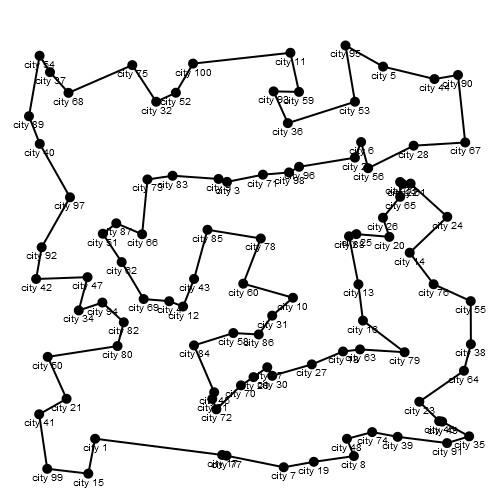

In [12]:
draw_tsp_scaled(coordinates, best_tour, size(coordinates, 2), "TSP", 500, 5)

In [10]:
function monte_carlo(tsp, dandelion_count, iterations, simulations)
    avg_time = 0

    ovr_best_cost = floatmax(Float64)
    ovr_worst_cost = 0

    cost_list = zeros(simulations)

    for i in 1:simulations
        best_cost, best_tour, convergence_curve, total_time = DO_tsp(dandelion_count, iterations, tsp.dimension, tsp.nodes, tsp.weights)
        cost_list[i] = best_cost
        avg_time += total_time/simulations

        if best_cost < ovr_best_cost
            ovr_best_cost = best_cost
        end
        if best_cost > ovr_worst_cost
            ovr_worst_cost = best_cost
        end
    end

    average = mean(cost_list)
    sd = std(cost_list)
    middle = median(cost_list)

    return ovr_best_cost, ovr_worst_cost, average, middle, sd, avg_time
end

monte_carlo (generic function with 1 method)

In [11]:
tsp_list = [:gr17 :bays29 :swiss42 :eil51 :berlin52 :st70 :eil76 :rat99 :kroA100 :kroC100 :kroE100 :eil101 :lin105 :pr107 :pr124]
df_tsp = DataFrame(TSP=String[], Optimal=String[], Best=String[], Worst=String[], Avg=String[], Median=String[], Std=String[], PDavg=String[], PDbest=String[], Time=String[])
for item in tsp_list
    curr_tsp = readTSPLIB(item)
    best, worst, average, middle, sd, time = monte_carlo(curr_tsp, 20, 100, 20)
    pdavg = (average - curr_tsp.optimal)*100/curr_tsp.optimal
    pdbest = (best - curr_tsp.optimal)*100/curr_tsp.optimal
    push!(df_tsp, [curr_tsp.name, @sprintf("%i", curr_tsp.optimal), @sprintf("%.2f", best), @sprintf("%.2f", worst), @sprintf("%.2f", average), @sprintf("%.2f", middle), @sprintf("%.2f", sd), @sprintf("%.2f", pdavg), @sprintf("%.2f", pdbest), @sprintf("%.2f", time)])
end
println(df_tsp)

15×10 DataFrame
 Row │ TSP       Optimal  Best      Worst     Avg       Median    Std     PDavg   PDbest  Time   
     │ String    String   String    String    String    String    String  String  String  String 
─────┼───────────────────────────────────────────────────────────────────────────────────────────
   1 │ gr17      2085     2085.00   2090.00   2088.25   2090.00   2.45    0.16    0.00    0.04
   2 │ bays29    2020     2020.00   2102.00   2037.10   2029.50   24.47   0.85    0.00    0.03
   3 │ swiss42   1273     1273.00   1337.00   1282.05   1273.00   17.30   0.71    0.00    0.15
   4 │ eil51     426      428.00    459.00    435.15    432.50    7.78    2.15    0.47    0.29
   5 │ berlin52  7542     7542.00   7989.00   7689.50   7660.50   152.46  1.96    0.00    0.35
   6 │ st70      675      675.00    740.00    685.00    682.50    14.37   1.48    0.00    1.36
   7 │ eil76     538      544.00    573.00    555.10    554.50    7.11    3.18    1.12    1.87
   8 │ rat99     1211    

In [24]:
# Function to extract circle coordinates from SVG file
function extract_circle_coordinates(svg_file::AbstractString)
    # Read SVG content from file
    svg_content = read(svg_file, String)

    # Regex pattern to match circle coordinates and fill color
    circle_pattern = r"<circle r=\"([-.\d]+)\" cx=\"([-.\d]+)\" cy=\"([-.\d]+)\" fill=\"(#[A-Fa-f0-9]+)\""

    # Extract circle information using regex
    circle_info = Float64[]
    fill_colors = String[]
    for match in eachmatch(circle_pattern, svg_content)
        r = parse(Float64, match.captures[1])
        cx = parse(Float64, match.captures[2])
        cy = parse(Float64, match.captures[3])
        fill_color = match.captures[4]
        push!(circle_info, cx)
        push!(circle_info, cy)
        push!(fill_colors, fill_color)
    end

    return reshape(circle_info, :, 2), fill_colors
end


# Specify the path to your SVG file
svg_file_path = "ColoredStipples.svg"

# Extract circle coordinates from the SVG file
coords, colors = extract_circle_coordinates(svg_file_path)


([190.93 443.41; 82.07 231.85; … ; 443.35 241.73; 323.49 609.24], ["#D5BCA7", "#E6E1BF", "#D8C2A4", "#EFEBCB", "#C8A684", "#D9DA9B", "#C4A746", "#DEEA97", "#DEE48E", "#EAF8DD"  …  "#C4CFD6", "#BCCDD8", "#878F97", "#7F848E", "#B4BBC8", "#868F99", "#9BA6B0", "#C1CEDA", "#C5D5DD", "#B7C0C8"])

In [25]:
function draw_tsp_scaled_color(x, o, n, filename, fill_colors, size=1000, radius=5, scale_factor=1)
    Drawing(size, size, "$filename.png")
    stretch = Int64(0.9 * size)
    origin(Int64(0.05 * size), Int64(0.05 * size))
    # draw cities with respective fill colors
    for i in 1:n
        A = Point(stretch * x[1, i] / scale_factor, stretch * x[2, i] / scale_factor)
        circle(A, radius, :fill, fill_colors[i])  # Use fill color from fill_colors array
        label("city $i", :S, A)
    end
    # connect cities by edges
    for i in 1:n-1
        A = Point(stretch * x[1, o[i]] / scale_factor, stretch * x[2, o[i]] / scale_factor)
        B = Point(stretch * x[1, o[i+1]] / scale_factor, stretch * x[2, o[i+1]] / scale_factor)
        line(A, B, :stroke)
    end
    # return to first city
    A = Point(stretch * x[1, o[n]] / scale_factor, stretch * x[2, o[n]] / scale_factor)
    B = Point(stretch * x[1, o[1]] / scale_factor, stretch * x[2, o[1]] / scale_factor)
    line(A, B, :stroke)
    finish()
    preview()
end

draw_tsp_scaled_color (generic function with 4 methods)

In [41]:
d = pairwise(Euclidean(), coords, dims=2)
best_fitness, best_tour, convergence_curve, total_time = DO_tsp(5, 10, size(coords, 1), coords, d)

10


(12771.181705541634, [208, 204, 200, 138, 190, 180, 188, 152, 150, 186  …  262, 264, 270, 268, 194, 196, 192, 198, 206, 210], [436237.3422008043, 12829.955368024757, 12829.955368024757, 12829.955368024757, 12771.026114330141, 12792.356385909667, 12771.181705541634, 12771.181705541634, 12771.181705541634, 12771.181705541634], 927.0199999809265)

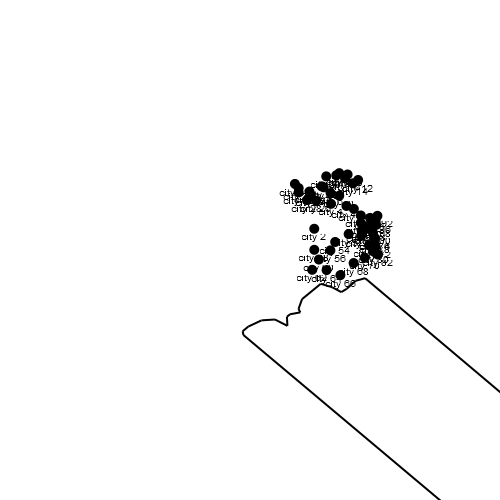

In [44]:
draw_tsp_scaled(coords, best_tour, size(coordinates, 2), "Image", 500, 5, 1000)